In [10]:
import csv
import numpy as np
import re
import matplotlib.pyplot as plt
import gc
import pandas as pd
%matplotlib inline

regex1 = r"\d+"
regex2 = r"c\d+"
X = np.zeros((10000,1000)) #1.000x10.000 matrix

In [11]:
#load data
with open("../Exercise 1/data_train.csv") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    next(readCSV) #discard header
    for row in readCSV:
        match = re.search(regex1,row[0])
        match2 = re.search(regex2,row[0])
        row_i = int(match.group(0))-1
        col_i = int(match2.group(0)[1:]) -1
        X[row_i,col_i] = int(row[1])

In [12]:
# returns array of training data and an array of test data
def cv(X, k=5):
    # split indices of nonz-zero values in k sets but randomly!
    nzR, nzC = np.nonzero(X)
    zipped = list(zip(nzR,nzC))
    np.random.shuffle(zipped)
    nzR, nzC = zip(*zipped)
    nzRsplit = np.array_split(nzR, k)
    nzCsplit = np.array_split(nzC, k)
     
    X_train_sets = []
    X_test_sets = []
    for i in range(k):
        X_train = np.copy(X)
        X_train[(nzRsplit[i], nzCsplit[i])] = 0
        print('X_train has ', np.count_nonzero(X_train), ' non-zeros.')
        X_train_sets.append(X_train)
    
        X_test = np.zeros(X.shape)
        X_test[(nzRsplit[i], nzCsplit[i])] = X[(nzRsplit[i], nzCsplit[i])]
        print('X_test has ', np.count_nonzero(X_test), ' non-zeros.')
        X_test_sets.append(X_test)
        
    return X_train_sets, X_test_sets

In [13]:
def rmse(I,X,Z,U):
    return np.sqrt(np.sum((I * (X - np.dot(U,Z.T)))**2)/len(X[X > 0]))

In [15]:
D,N = X.shape
print('X: ',X.shape)
K = 50
U = np.random.rand(D,K)
Z = np.random.rand(N,K)
n_epochs = 30
lmda = 0.00001       
gamma = 0.0001       # step size

train_errors = {k: [] for k in range(n_epochs)}
test_errors = {k: [] for k in range(n_epochs)}
gc.collect()
#for it in range(5):
#    for epoch in range(n_epochs):
#        train_errors[epoch].append(it*epoch)           
#for epoch in range(n_epochs):
#    print 'epoch: ', epoch, ', ', train_errors[epoch]

X:  (10000, 1000)


5411

In [16]:
X_train_set, X_test_set = cv(X, k=5)
count = 0
for X_train, X_test in zip(X_train_set, X_test_set):
    I = X_train.copy()
    I[I > 0] = 1
    I2 = X_test.copy()
    I2[I2 > 0] = 1
    
    #DO SGD
    ds,ns = X_train.nonzero()
    #print 'Users: ',users.shape
    #print 'Movies: ', movies.shape

    print('CV iter = ', count)
    for epoch in range(n_epochs):
        for d, n in zip(ds,ns):
            gamma = 0.001*(1.0/(np.sqrt(epoch+1.0)))
            #e = R[u, i] - prediction(U[:,u],Z[:,i])
            e = X_train[d, n] - np.dot(U[d,:],Z[n,:].T)
            U[d,:] += gamma * ( e * Z[n,:].T - lmda*U[d,:] )
            Z[n,:] += gamma * ( e * U[d,:] - lmda*Z[n,:] )
        # TODO: correct rmse function
        train_rmse = rmse(I,X_train,Z,U) # Calculate root mean squared error from train dataset
        test_rmse = rmse(I2,X_test,Z,U) # Calculate root mean squared error from test dataset
        train_errors[epoch].append(train_rmse)
        test_errors[epoch].append(test_rmse)
        
    count += 1
    gc.collect()
    #if count >= 2:
    #    break

X_train has  941561  non-zeros.
X_test has  235391  non-zeros.
X_train has  941561  non-zeros.
X_test has  235391  non-zeros.
X_train has  941562  non-zeros.
X_test has  235390  non-zeros.
X_train has  941562  non-zeros.
X_test has  235390  non-zeros.
X_train has  941562  non-zeros.
X_test has  235390  non-zeros.
CV iter =  0
CV iter =  1
CV iter =  2
CV iter =  3
CV iter =  4


In [17]:
tr_err = []
ts_err = []
#for epoch in range(n_epochs):
#    print train_errors[epoch]
#    print test_errors[epoch]
for epoch in range(n_epochs):
    tr_err.append( np.mean(train_errors[epoch]) )
    ts_err.append( np.mean(test_errors[epoch]) )
    
print(len(tr_err))   
print(len(ts_err))
print(len(range(n_epochs)))

30
30
30


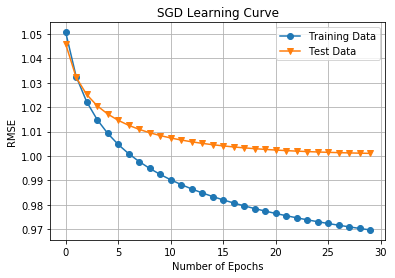

In [18]:
#for epoch in range(n_epochs):
#    train_errors[epoch] = np.mean(train_errors[epoch])
#    test_errors[epoch] = np.mean(test_errors[epoch])


plt.plot(range(n_epochs), tr_err, marker='o', label='Training Data');
plt.plot(range(n_epochs), ts_err, marker='v', label='Test Data');
plt.title('SGD Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [ ]:
#now lets predict the data from samplesubmission
fout = open('mysubmission.csv', 'w')
fout.write("Id,Prediction\n")
with open("SampleSubmission.csv") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    next(readCSV) #discard header
    for row in readCSV:
        match = re.search(regex1,row[0])
        match2 = re.search(regex2,row[0])
        row_i = int(match.group(0))-1
        col_i = int(match2.group(0)[1:]) -1
        calc = prediction(U[:,row_i], Z[:,col_i])
        print(calc)
        fout.write(row[0]+","+str(calc)+"\n")
    fout.close()